In [229]:
from keras import models
from keras import layers

def build_network(hidden_layer_size, output_size=10):
    network = models.Sequential()
    network.add(layers.Dense(hidden_layer_size, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dense(output_size, activation='softmax'))
    
    network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return network

In [230]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_data(train_size):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
        
    x_val = x_train[train_size:]
    y_val = y_train[train_size:]
    
    x_train = x_train[:train_size]
    y_train = y_train[:train_size]

    x_train = x_train.reshape((-1, 28*28))
    x_train = x_train.astype('float32')/255

    x_test = x_test.reshape((-1, 28*28))
    x_test = x_test.astype('float32')/255

    x_val = x_val.reshape((-1, 28*28))
    x_val = x_val.astype('float32')/255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)
    
    return x_train, y_train, x_test, y_test, x_val, y_val

In [248]:
import matplotlib.pyplot as plt

def plot_results(history):
    history_dict = history.history
    
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(loss_values)+1)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
def compare_results(history1, history2):
    history_dict1 = history1.history
    history_dict2 = history2.history
    
    loss_values1 = history_dict1['loss']
    loss_values2 = history_dict2['loss']
    val_loss_values1 = history_dict1['val_loss']
    val_loss_values2 = history_dict2['val_loss']
    
    acc_values1 = history_dict1['acc']
    acc_values2 = history_dict2['acc']
    val_acc_values1 = history_dict1['val_acc']
    val_acc_values2 = history_dict2['val_acc']
    
    epochs = range(1, len(loss_values1)+1)
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_values1, 'bo', label='Training loss 1')
    plt.plot(epochs, loss_values2, 'ro', label='Training loss 2')
    plt.plot(epochs, val_loss_values1, 'b', label='Validation loss 1')
    plt.plot(epochs, val_loss_values2, 'r', label='Validation loss 2')
    plt.title('Training and validation loss comparation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(epochs, acc_values1, 'bo', label='Training accuracy 1')
    plt.plot(epochs, acc_values2, 'ro', label='Training accuracy 2')
    plt.plot(epochs, val_acc_values1, 'b', label='Validation accuracy 1')
    plt.plot(epochs, val_acc_values2, 'r', label='Validation accuracy 2')
    plt.title('Training and validation accuracy comparation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [232]:
network = build_network(512)
x_train, y_train, x_test, y_test, x_val, y_val = prepare_data(1000)

In [233]:
history = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 1.3317 - acc: 0.6060 - val_loss: 0.9060 - val_acc: 0.7296
Epoch 2/20
1000/1000 [==============================] - 1s 777us/step - loss: 0.6127 - acc: 0.8390 - val_loss: 0.6031 - val_acc: 0.8414
Epoch 3/20
1000/1000 [==============================] - 1s 775us/step - loss: 0.4205 - acc: 0.9080 - val_loss: 0.5120 - val_acc: 0.8597
Epoch 4/20
1000/1000 [==============================] - 1s 774us/step - loss: 0.3447 - acc: 0.9130 - val_loss: 0.5283 - val_acc: 0.8450
Epoch 5/20
1000/1000 [==============================] - 1s 786us/step - loss: 0.2567 - acc: 0.9440 - val_loss: 0.4698 - val_acc: 0.8576
Epoch 6/20
1000/1000 [==============================] - 1s 784us/step - loss: 0.2221 - acc: 0.9530 - val_loss: 0.4733 - val_acc: 0.8595
Epoch 7/20
1000/1000 [==============================] - 1s 784us/step - loss: 0.1942 - acc: 0.9610 - val_loss: 0.4256 - val_acc: 0.8697
E

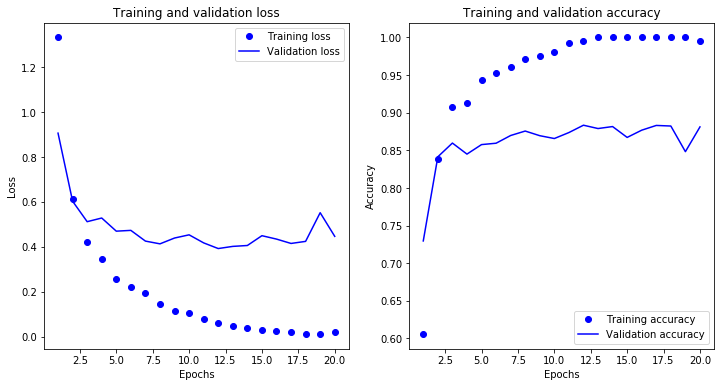

In [234]:
plot_results(history)

In [235]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 45us/step
test acc: 0.8882


In [236]:
network = build_network(256)
history2 = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5052 - acc: 0.5870 - val_loss: 0.9991 - val_acc: 0.7401
Epoch 2/20
1000/1000 [==============================] - 1s 572us/step - loss: 0.7360 - acc: 0.8350 - val_loss: 0.6971 - val_acc: 0.8222
Epoch 3/20
1000/1000 [==============================] - 1s 573us/step - loss: 0.5261 - acc: 0.8850 - val_loss: 0.5953 - val_acc: 0.8401
Epoch 4/20
1000/1000 [==============================] - 1s 570us/step - loss: 0.4227 - acc: 0.9070 - val_loss: 0.5457 - val_acc: 0.8467
Epoch 5/20
1000/1000 [==============================] - 1s 607us/step - loss: 0.3431 - acc: 0.9250 - val_loss: 0.5240 - val_acc: 0.8506
Epoch 6/20
1000/1000 [==============================] - 1s 610us/step - loss: 0.2908 - acc: 0.9400 - val_loss: 0.4653 - val_acc: 0.8683
Epoch 7/20
1000/1000 [==============================] - 1s 581us/step - loss: 0.2485 - acc: 0.9540 - val_loss: 0.4559 - val_acc: 0.8668
E

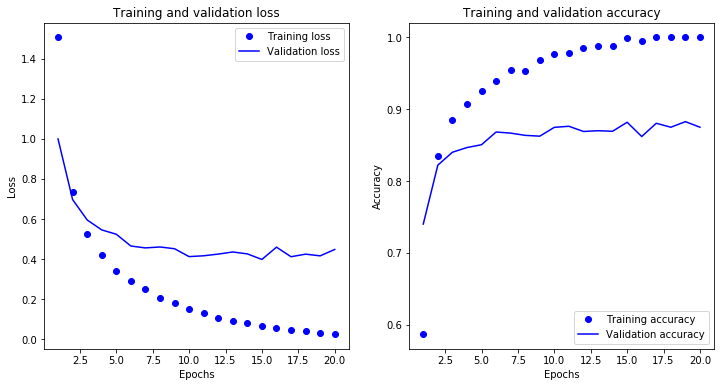

In [239]:
plot_results(history2)

In [247]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 35us/step
test acc: 0.879


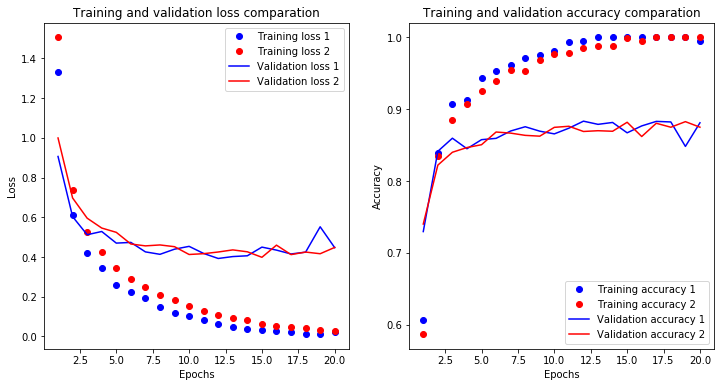

In [249]:
compare_results(history, history2)